<a href="https://colab.research.google.com/github/yerinsally/machine_learning_perfect_guide/blob/main/1week_0308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기
1. 열린데이터광장 - 서울 공공자전거(따릉이)
2. 용산구 한정 따릉이 이용건수 데이터 전처리 후 시각화하여 분석대상 찾아보자!

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 자치구 = 용산구인 대여소 정보 : data1 
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/hw/final_teamproject/bicycle_yongsan.csv', encoding = 'cp949')
data1.head()

,대여소\n번호,보관소(대여소)명,자치구,소재지(위치),위도,경도,설치\n시기,거치대수,운영\n방식
0,800,목월공원 앞,용산구,서울특별시 용산구 원효로4가 109-10,37.532433,126.954742,2016-06-29,15.0,LCD
1,802,한강진역 2번 출구 앞,용산구,서울특별시 용산구 한남동 726-494,37.541153,127.002212,2016-06-29,10.0,LCD
2,803,한남초교 앞 보도육교,용산구,서울특별시 용산구 한남동 725-17,37.538139,127.004097,2016-06-29,10.0,LCD
3,805,문배어린이공원 앞,용산구,서울특별시 용산구 문배동 34-10,37.536758,126.970001,2016-06-29,9.0,LCD
4,806,전자랜드 본관 앞,용산구,서울특별시 용산구 한강로3가 16-8,37.533066,126.960731,2016-06-29,15.0,LCD


In [ ]:
# 자치구 = 용산구인 대여소번호 식별 후 추출한 이용정보 : data2
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/hw/final_teamproject/bicycle_yongsan_use.csv', encoding = 'cp949')
data2.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,800,800. 목월공원 앞,일일권,\N,30대,3,221.24,2.13,9205.08,174
1,2022-06-01,800,800. 목월공원 앞,일일권,F,20대,3,677.5,6.15,26499.37,105
2,2022-06-01,800,800. 목월공원 앞,일일권,F,30대,3,339.87,3.07,13229.38,70
3,2022-06-01,800,800. 목월공원 앞,일일권,F,기타,1,249,2.98,12832.33,81
4,2022-06-01,800,800. 목월공원 앞,일일권,M,20대,2,581,4.51,19469.70,142


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소
번호     88 non-null     int64  
 1   보관소(대여소)명  88 non-null     object 
 2   자치구        88 non-null     object 
 3   소재지(위치)    88 non-null     object 
 4   위도         88 non-null     float64
 5   경도         88 non-null     float64
 6   설치
시기      87 non-null     object 
 7   거치대수       87 non-null     float64
 8   운영
방식      88 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.3+ KB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29719 entries, 0 to 29718
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여일자     29719 non-null  object 
 1   대여소번호    29719 non-null  int64  
 2   대여소      29719 non-null  object 
 3   대여구분코드   29719 non-null  object 
 4   성별       27904 non-null  object 
 5   연령대코드    29719 non-null  object 
 6   이용건수     29719 non-null  int64  
 7   운동량      29719 non-null  object 
 8   탄소량      29719 non-null  object 
 9   이동거리(M)  29719 non-null  float64
 10  이용시간(분)  29719 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.5+ MB


In [ ]:
# data1의 컬럼명 바꾸기
data1 = data1.rename(columns = {'대여소\n번호':'대여소번호'})
data1 = data1.rename(columns = {'보관소(대여소)명':'대여소명'})
data1 = data1.rename(columns = {'소재지(위치)':'위치'})
data1 = data1.rename(columns = {'설치\n시기':'설치시기'})
data1 = data1.rename(columns = {'운영\n방식':'운영방식'})
data1

,대여소번호,대여소명,자치구,위치,위도,경도,설치시기,거치대수,운영방식
0,800,목월공원 앞,용산구,서울특별시 용산구 원효로4가 109-10,37.532433,126.954742,2016-06-29,15.0,LCD
1,802,한강진역 2번 출구 앞,용산구,서울특별시 용산구 한남동 726-494,37.541153,127.002212,2016-06-29,10.0,LCD
2,803,한남초교 앞 보도육교,용산구,서울특별시 용산구 한남동 725-17,37.538139,127.004097,2016-06-29,10.0,LCD
3,805,문배어린이공원 앞,용산구,서울특별시 용산구 문배동 34-10,37.536758,126.970001,2016-06-29,9.0,LCD
4,806,전자랜드 본관 앞,용산구,서울특별시 용산구 한강로3가 16-8,37.533066,126.960731,2016-06-29,15.0,LCD
...,...,...,...,...,...,...,...,...,...
83,4634,이태원역 3번 출구,용산구,이태원동 119-23,37.534401,126.994667,NaN,NaN,QR
84,4636,용산구꿈나무종합타운 앞,용산구,용산구 원효로2가 1-22,37.537861,126.965653,2022-06-08,8.0,QR
85,4637,용산시티파크 101동 앞,용산구,서빙고로 35,37.524681,126.968193,2022-06-09,10.0,QR
86,4638,청파동삼거리 앞,용산구,청파동1가 180-33,37.547337,126.970383,2022-06-09,10.0,QR


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   88 non-null     int64  
 1   대여소명    88 non-null     object 
 2   자치구     88 non-null     object 
 3   위치      88 non-null     object 
 4   위도      88 non-null     float64
 5   경도      88 non-null     float64
 6   설치시기    87 non-null     object 
 7   거치대수    87 non-null     float64
 8   운영방식    88 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.3+ KB


## data1

In [ ]:
# 위도/경도 데이터이기에 태블로로 시각화함
# 한강 근처에 대여소 및 거치대 수가 많은 것을 확인할 수 있음.
# 한강 근처 따릉이 이용 효율성 증가 방안 분석해보자.

## data2

In [ ]:
# 데이터 먼저 탐색
data2['대여구분코드'].value_counts()

정기권         18808
일일권          9519
일일권(비회원)      861
단체권           531
Name: 대여구분코드, dtype: int64

In [ ]:
data2['성별'].value_counts()

M     10823
\N     8921
F      8153
m         5
f         2
Name: 성별, dtype: int64

In [ ]:
data2['연령대코드'].value_counts()

20대      8053
30대      6869
40대      4478
기타       4034
50대      3131
10대      1732
60대      1248
70대이상     174
Name: 연령대코드, dtype: int64

In [ ]:
# NA 삭제
data2_new = data2.dropna(axis = 0) # NA 삭제
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27904 entries, 0 to 29718
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여일자     27904 non-null  object 
 1   대여소번호    27904 non-null  int64  
 2   대여소      27904 non-null  object 
 3   대여구분코드   27904 non-null  object 
 4   성별       27904 non-null  object 
 5   연령대코드    27904 non-null  object 
 6   이용건수     27904 non-null  int64  
 7   운동량      27904 non-null  object 
 8   탄소량      27904 non-null  object 
 9   이동거리(M)  27904 non-null  float64
 10  이용시간(분)  27904 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.6+ MB


In [ ]:
# 성별 컬럼의 행이 m,f이면 삭제
data2_new = data2_new.drop(index = data2_new[data2_new['성별'] == 'm'].index)
data2_new = data2_new.drop(index = data2_new[data2_new['성별'] == 'f'].index)

In [ ]:
# 대여구분코드, 성별, 연령대코드 컬럼의 행 변환 -> 범주형 데이터터
data2_new['대여구분코드'] = data2_new['대여구분코드'].replace(['정기권','일일권','일일권(비회원)','단체권'],['1','2','3','4'])
data2_new['성별'] = data2_new['성별'].replace(['M','F','\\N'],['1','2','3'])

In [ ]:
data2_new.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,800,800. 목월공원 앞,2,3,30대,3,221.24,2.13,9205.08,174
1,2022-06-01,800,800. 목월공원 앞,2,2,20대,3,677.5,6.15,26499.37,105
2,2022-06-01,800,800. 목월공원 앞,2,2,30대,3,339.87,3.07,13229.38,70
3,2022-06-01,800,800. 목월공원 앞,2,2,기타,1,249,2.98,12832.33,81
4,2022-06-01,800,800. 목월공원 앞,2,1,20대,2,581,4.51,19469.70,142


In [ ]:
data2_new['운동량'].value_counts()

0          252
\N          67
18.02       16
20.59       14
27.8        14
          ... 
405.66       1
1166.78      1
1599.91      1
1195.54      1
1318.77      1
Name: 운동량, Length: 19882, dtype: int64

In [ ]:
# 0, \N 값 없애기
data2_new = data2_new.drop(index = data2_new[data2_new['운동량'] == 0].index)
data2_new = data2_new.drop(index = data2_new[data2_new['운동량'] == '\\N'].index)

In [ ]:
data2_new['탄소량'].value_counts()

0        253
0.19     232
0.32     200
0.24     198
0.18     197
        ... 
21.49      1
21.44      1
15.21      1
21.76      1
15.52      1
Name: 탄소량, Length: 1448, dtype: int64

In [ ]:
# 0 값 없애기
data2_new = data2_new.drop(index = data2_new[data2_new['탄소량'] == 0].index)

In [ ]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27830 entries, 0 to 29718
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여일자     27830 non-null  object 
 1   대여소번호    27830 non-null  int64  
 2   대여소      27830 non-null  object 
 3   대여구분코드   27830 non-null  object 
 4   성별       27830 non-null  object 
 5   연령대코드    27830 non-null  object 
 6   이용건수     27830 non-null  int64  
 7   운동량      27830 non-null  object 
 8   탄소량      27830 non-null  object 
 9   이동거리(M)  27830 non-null  float64
 10  이용시간(분)  27830 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.5+ MB


In [ ]:
# 운동량, 탄소량 변수 척도 numeric으로 변환
data2_new['운동량'] = pd.to_numeric(data2_new['운동량'])
data2_new['탄소량'] = pd.to_numeric(data2_new['탄소량'])

In [ ]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27830 entries, 0 to 29718
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여일자     27830 non-null  object 
 1   대여소번호    27830 non-null  int64  
 2   대여소      27830 non-null  object 
 3   대여구분코드   27830 non-null  object 
 4   성별       27830 non-null  object 
 5   연령대코드    27830 non-null  object 
 6   이용건수     27830 non-null  int64  
 7   운동량      27830 non-null  float64
 8   탄소량      27830 non-null  float64
 9   이동거리(M)  27830 non-null  float64
 10  이용시간(분)  27830 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.5+ MB


In [ ]:
# 변수 시각화 : 글꼴 불러오기기
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


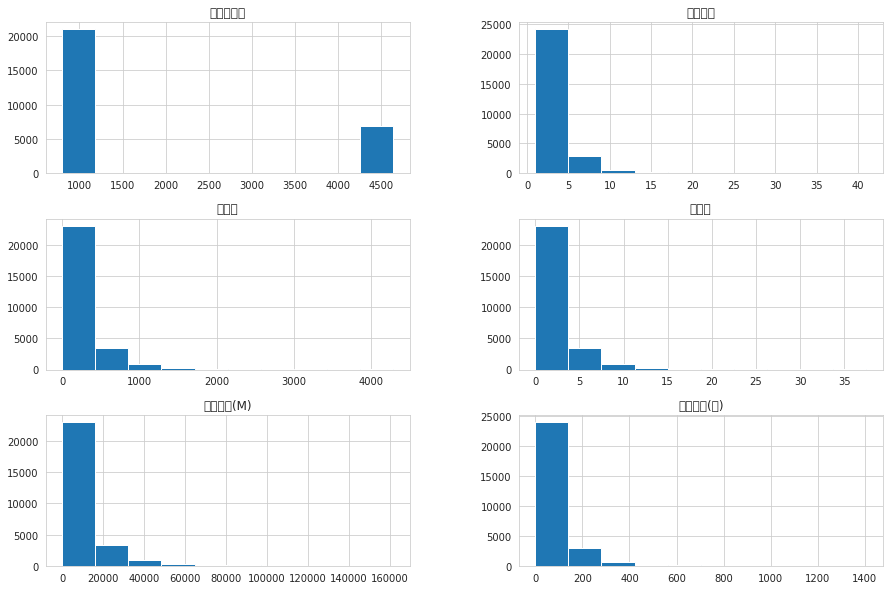

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
data2_new.hist(figsize = (15,10));

<AxesSubplot:xlabel='연령대코드', ylabel='count'>

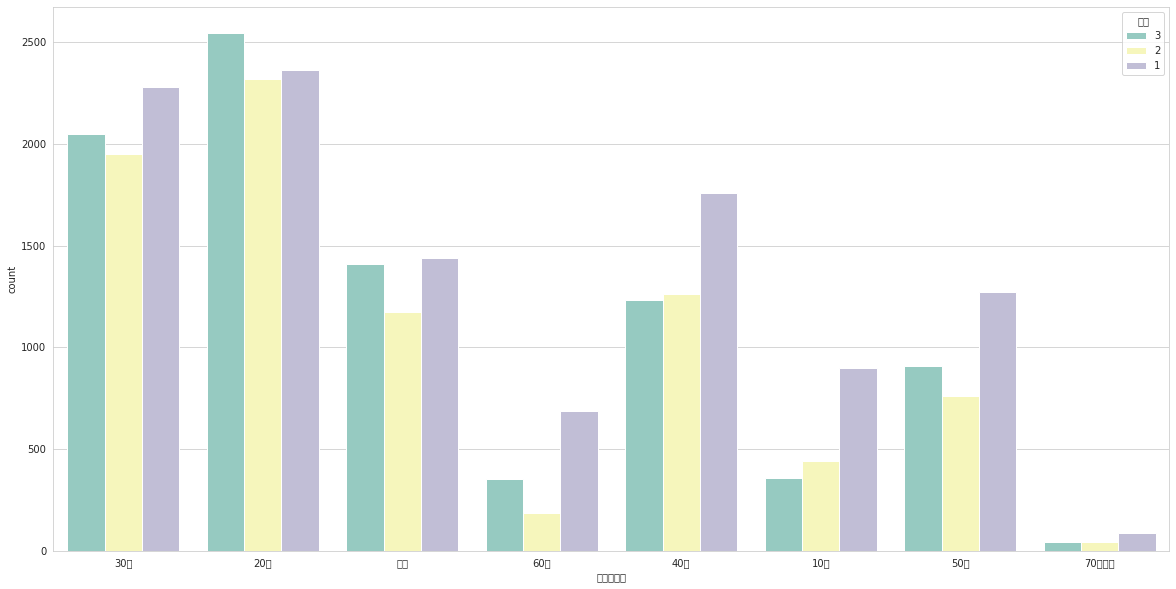

In [ ]:
# 연령별, 성별 사용건수
sns.countplot(data = data2_new, x = "연령대코드", hue = "성별", palette='Set3')
# 20, 30대가 확실히 많음.

In [ ]:
# 이동거리가 큰 대여소 top 20

# 이동거리 기준 오름차순 정렬
bike_moving_top20 = data2_new.head(20).sort_values(by = "이동거리(M)", ascending = True)

# 시각화
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(bike_moving_top20, y = "대여소", x = "이동거리(M)", orientation = "h", color = "이동거리(M)")
fig.update_layout(title = dict(text = "top20", font_size = 20), yaxis = dict(title = "대여소"))
fig.show()

In [ ]:
bike_moving_top20

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
19,2022-06-01,802,802. 한강진역 2번 출구 앞,2,1,20대,1,26.43,0.21,890.00,15
18,2022-06-01,802,802. 한강진역 2번 출구 앞,2,2,30대,1,44.33,0.45,1930.00,18
6,2022-06-01,800,800. 목월공원 앞,1,3,20대,3,48.22,0.49,2081.20,66
17,2022-06-01,800,800. 목월공원 앞,1,1,기타,2,82.38,0.59,2550.00,12
12,2022-06-01,800,800. 목월공원 앞,1,2,기타,1,111.55,1.17,5030.00,25
8,2022-06-01,800,800. 목월공원 앞,1,3,60대,1,205.92,1.86,8000.00,51
16,2022-06-01,800,800. 목월공원 앞,1,1,60대,1,178.96,1.87,8070.00,51
13,2022-06-01,800,800. 목월공원 앞,1,1,20대,5,254.55,1.89,8171.84,85
15,2022-06-01,800,800. 목월공원 앞,1,1,40대,2,237.93,2.09,9008.60,68
0,2022-06-01,800,800. 목월공원 앞,2,3,30대,3,221.24,2.13,9205.08,174
